In [1]:
import fbma
import pandas as pd

In [2]:
fbma.msgs.head()

,Unnamed: 0,members,sender,text,time
0,0,"['Kevin Wang', 'Walton Wu']",Kevin Wang,don't take calcium supplements,2011-06-13 21:20:00
1,1,"['Kevin Wang', 'Walton Wu']",Kevin Wang,my doctor was all,2011-06-13 21:20:00
2,2,"['Kevin Wang', 'Walton Wu']",Kevin Wang,i dunno,2011-06-13 21:20:00
3,3,"['Kevin Wang', 'Walton Wu']",Kevin Wang,asdf,2011-06-13 21:18:00
4,4,"['Kevin Wang', 'Walton Wu']",Walton Wu,lol,2011-06-13 21:18:00


In [3]:
%matplotlib inline

In [4]:
msgs = fbma.msgs

In [67]:
kevin = msgs[msgs['sender'].isin(("1847184391@facebook.com", "Kevin Wang"))]

In [68]:
kevin.head()

,Unnamed: 0,members,sender,text,time
0,0,"['Kevin Wang', 'Walton Wu']",Kevin Wang,don't take calcium supplements,2011-06-13 21:20:00
1,1,"['Kevin Wang', 'Walton Wu']",Kevin Wang,my doctor was all,2011-06-13 21:20:00
2,2,"['Kevin Wang', 'Walton Wu']",Kevin Wang,i dunno,2011-06-13 21:20:00
3,3,"['Kevin Wang', 'Walton Wu']",Kevin Wang,asdf,2011-06-13 21:18:00
7,7,"['Kevin Wang', 'Walton Wu']",Kevin Wang,lol,2011-06-13 21:18:00


In [69]:
others = msgs[~msgs['sender'].isin(("1847184391@facebook.com", "Kevin Wang"))]

In [70]:
others.head()

,Unnamed: 0,members,sender,text,time
4,4,"['Kevin Wang', 'Walton Wu']",Walton Wu,lol,2011-06-13 21:18:00
5,5,"['Kevin Wang', 'Walton Wu']",Walton Wu,lt helps,2011-06-13 21:18:00
6,6,"['Kevin Wang', 'Walton Wu']",Walton Wu,want some calcium pills?,2011-06-13 21:18:00
9,9,"['Kevin Wang', 'Walton Wu']",Walton Wu,l'm pretty much recovered,2011-06-13 21:18:00
10,10,"['Kevin Wang', 'Walton Wu']",Walton Wu,l'm surprised you aren't recovered,2011-06-13 21:18:00


In [9]:
from collections import Counter
def make_words(df, case_sensitive = False):
    words = Counter()
    txt = df["text"]
    if case_sensitive == False:
        txt = txt.str.lower()
    #print(txt.str.split())
    txt.str.split().apply(words.update)
    return words

In [10]:
kevin = kevin[1:]

In [11]:
others[others.text.isnull()]
#kevin[kevin.text.isnull()]

,Unnamed: 0,members,sender,text,time


In [12]:
kwords = make_words(kevin)
owords = make_words(others)

In [13]:
#kwords

In [14]:
def laugh_words(words):
    for word, amount in sorted(words.items(), key=lambda x: x[1], reverse = True):
        if (set(word) in ({"h", "a"}, {"l", "o"})) or (word[:4] == "rofl"):
            if word not in {'ah'}:
                yield (word, amount)

In [15]:
lwords = pd.DataFrame(list(laugh_words(kwords)))

In [16]:
lwords.head()

,0,1
0,lol,7628
1,haha,1004
2,rofl,560
3,hahaha,342
4,hahahaha,267


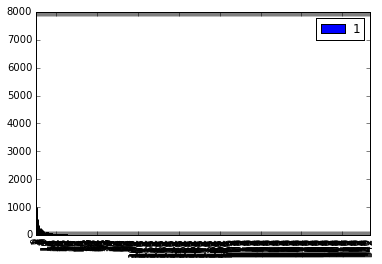

In [17]:
lwords.plot(kind="bar")

In [18]:
lwords

,0,1
0,lol,7628
1,haha,1004
2,rofl,560
3,hahaha,342
4,hahahaha,267
5,lololol,245
6,lolololol,206
7,hahahahah,168
8,hahahah,142
9,lollll,124


In [19]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [20]:
print_full(lwords)

                                                     0     1
0                                                  lol  7628
1                                                 haha  1004
2                                                 rofl   560
3                                               hahaha   342
4                                             hahahaha   267
5                                              lololol   245
6                                            lolololol   206
7                                            hahahahah   168
8                                              hahahah   142
9                                               lollll   124
10                                          hahahahaha   121
11                                         lololololol    93
12                                         hahahahahah    92
13                                             lolllll    76
14                                               lolll    66
15                      

In [21]:
type(kwords)

collections.Counter

In [22]:
sum(kwords.values())

594772

In [23]:
lwords[1].sum()

12426

In [24]:
lwords[1].sum()/sum(kwords.values())
#proportion of the words that I say that are laughter

0.020892039302455395

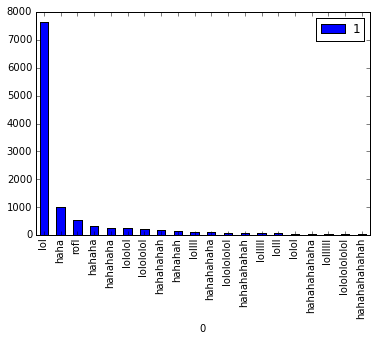

In [25]:
lwords = lwords.set_index(0)
lwords[:20].plot(kind="bar")

In [26]:
#x = lwords[:20].plot(kind="bar")
#x.set_xticklabels(lwords[0])

In [27]:
their_lwords = pd.DataFrame(list(laugh_words(owords))).set_index(0)

In [28]:
their_lwords.head()

,1
0,
lol,29162
haha,3299
hahaha,979
lololol,854
lolol,798


In [29]:
their_lwords

,1
0,
lol,29162
haha,3299
hahaha,979
lololol,854
lolol,798
rofl,458
hahah,399
hahahaha,323
lolololol,312


In [30]:
"lol" in lwords

False

In [31]:
"lol" in lwords.index

True

In [32]:
only_others_laugh = their_lwords[~their_lwords.index.isin(lwords.index)]
len(only_others_laugh)

420

In [33]:
only_me_laugh = lwords[~lwords.index.isin(their_lwords.index)]
len(only_me_laugh)

179

In [34]:
both_laugh = lwords[lwords.index.isin(their_lwords.index)]
len(lwords[lwords.index.isin(their_lwords.index)]), len(their_lwords[their_lwords.index.isin(lwords.index)])

(164, 164)

In [35]:
only_me_laugh

,1
0,
lollllllllllllll,11
hahahahaahah,9
lolllllllllllllllll,7
ololololol,7
lollllllllllllllllllll,6
lolllllllllllllllllllllllll,6
hahahahahahahahah,5
roflroflrofl,5
lollllllllllllllllllllllll,5


In [36]:
only_others_laugh

,1
0,
ahaha,211
hahha,56
looll,28
loollo,26
ahha,21
looooooool,20
loooooool,18
ahahha,16
hahahhaa,16


In [37]:
res = lwords[lwords.index.isin(their_lwords.index)].merge(their_lwords[their_lwords.index.isin(lwords.index)], left_index=True, right_index=True)
res

,1_x,1_y
0,,
lol,7628,29162
haha,1004,3299
hahaha,342,979
lololol,245,854
lolol,60,798
rofl,560,458
hahah,20,399
hahahaha,267,323
lolololol,206,312


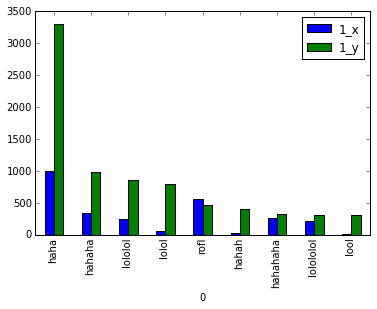

In [38]:
res[1:10].plot(kind="bar")

In [39]:
#kwords

In [40]:
len(kwords)

39356

In [ ]:
len(owords)

107485

In [ ]:
%%time
#b = DataFrame(msgs.text.str.split(',').tolist(), index=a.var2).stack()
wordlist = []
for index, row in msgs.iterrows(): #itertuples is faster so use it instead
    for word in row.text.split():
        wordlist.append({"word": word, "sender": row.sender, "members": row.members, "time": row.time})

In [45]:
words = pd.DataFrame(wordlist)
#del wordlist

In [46]:
urls = words[words.word.str.startswith("http")]
urlbases = urls.copy()
urlbases.word = urlbases.word.str.split("/").apply(lambda x: x[2] if len(x) >= 3 else None)
myurlbases = urlbases[urls.sender == "Kevin Wang"]
otherurlbases = urlbases[urls.sender != "Kevin Wang"]
myurlbases.word.value_counts().head()

www.youtube.com     414
www.facebook.com    225
i.imgur.com         163
pastebin.com         88
docs.google.com      80
dtype: int64

In [47]:
urls.word.sample()

1453387    https://www.youtube.com/watch?v=VoUR3FEV4d4
Name: word, dtype: object

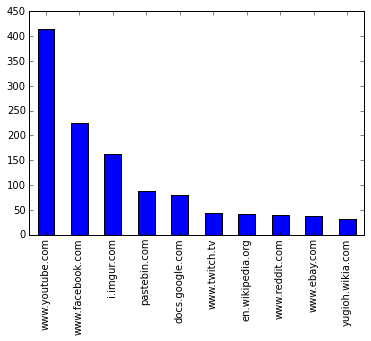

In [48]:
myurlbases.word.value_counts()[:10].plot(kind="bar")

In [49]:
laughs = words[words.word.str.startswith("lol") | words.word.str.startswith("rofl")]

In [50]:
def is_laugh_word(word):
    word = word.lower()
    if ((set(word) in ({"h", "a"}, {"l", "o"})) or (word[:4] == "rofl")) and word not in {'ah'}:
        return True
    return False

In [51]:
laughs = words[words.word.apply(is_laugh_word)]
laughs.word.value_counts().head()

lol       21173
LOL       11824
haha       3584
Lol        3268
hahaha      919
dtype: int64

In [52]:
def laugh_words(words):
    return words[words.word.apply(is_laugh_word)]

In [53]:
laugh_words(words[words.sender == "Kevin Wang"]).word.str.lower().value_counts()

lol                                                                7628
haha                                                               1004
rofl                                                                560
hahaha                                                              342
hahahaha                                                            267
lololol                                                             245
lolololol                                                           206
hahahahah                                                           168
hahahah                                                             142
lollll                                                              124
hahahahaha                                                          121
lololololol                                                          93
hahahahahah                                                          92
lolllll                                                         

In [54]:
my_laugh_words = laugh_words(words[words.sender == "Kevin Wang"])

In [55]:
my_laugh_words.groupby([my_laugh_words.time.dt.year, my_laugh_words.word]).word.value_counts()

      word                                                                              
2011  AHA                                       AHA                                           1
      AHAHAAHAH                                 AHAHAAHAH                                     1
      AHAHAHAHAH                                AHAHAHAHAH                                    1
      AHHAhHhhh                                 AHHAhHhhh                                     1
      AHHHH                                     AHHHH                                         2
      AHHHHHHHHH                                AHHHHHHHHH                                    1
      AHHHHHHHHHHHH                             AHHHHHHHHHHHH                                 1
      AHHHHHHHHHHHHHHHH                         AHHHHHHHHHHHHHHHH                             1
      AHHHHHHHHHHHHHHHHHHHHH                    AHHHHHHHHHHHHHHHHHHHHH                        1
      AHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH     

In [56]:
my_laugh_words.groupby([my_laugh_words.time.dt.year, my_laugh_words.word.str.lower()]).word.value_counts()

      word                                                                              
2011  aha                                       aha                                           9
                                                AHA                                           1
      ahah                                      ahah                                         18
      ahahaahah                                 AHAHAAHAH                                     1
      ahahaahahah                               ahahaahahah                                   1
      ahahah                                    ahahah                                       17
      ahahaha                                   ahahaha                                       4
      ahahahah                                  ahahahah                                     20
      ahahahaha                                 ahahahaha                                     1
      ahahahahaah                              

In [57]:
my_laugh_words.word = my_laugh_words.word.str.lower()
my_laugh_words.head()

,members,sender,time,word
18,"['Kevin Wang', 'Walton Wu']",Kevin Wang,2011-06-13 21:18:00,lol
66,"['Kevin Wang', 'Walton Wu']",Kevin Wang,2011-06-13 21:17:00,lol
77,"['Kevin Wang', 'Walton Wu']",Kevin Wang,2011-06-13 21:16:00,lol
85,"['Kevin Wang', 'Walton Wu']",Kevin Wang,2011-06-13 20:27:00,lol
220,"['Kevin Wang', 'Walton Wu']",Kevin Wang,2011-06-12 21:43:00,lolol


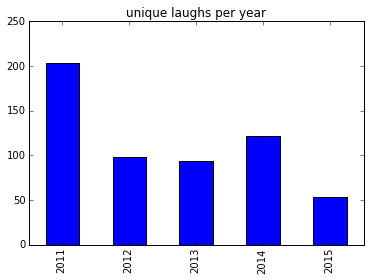

In [58]:
my_laugh_words.groupby([my_laugh_words.time.dt.year]).word.nunique().plot(kind="bar", title="unique laughs per year")

In [59]:
my_laugh_words.groupby([my_laugh_words.time.dt.year]).word.nunique()

2011    203
2012     98
2013     94
2014    122
2015     53
Name: word, dtype: int64

In [60]:
my_laugh_words.groupby([my_laugh_words.word, my_laugh_words.time.dt.year]).word.value_counts().lol

2011  lol    3146
2012  lol    1055
2013  lol     972
2014  lol    1630
2015  lol     825
dtype: int64

In [61]:
my_laugh_words.groupby([my_laugh_words.time.dt.year]).word.value_counts().sum(level=[0])

2011    4656
2012    1708
2013    1792
2014    2981
2015    1289
dtype: int64

In [62]:
my_words = words[words.sender == "Kevin Wang"]
my_words.groupby(my_words.time.dt.year).word.count()

2011    172907
2012     87299
2013    112175
2014    134189
2015     88206
Name: word, dtype: int64

In [88]:
kevin.time.value_counts().order().tail()

2011-05-23 20:39:00    22
2013-05-29 00:34:00    23
2013-11-22 22:52:00    24
2012-05-10 18:56:00    24
2013-04-12 19:17:00    28
dtype: int64

In [64]:
msgs.sort('time').head()
#rofl

,Unnamed: 0,members,sender,text,time
621933,621933,"['1282059499@facebook.com', '1847184391@facebo...",1847184391@facebook.com,Click the link below to be Kevin Wang's neighb...,2009-10-12 20:18:00
563584,563584,"['Ryan Saeta', 'Kevin Wang']",1847184391@facebook.com,Click the link below to be Kevin Wang's neighb...,2009-10-13 19:21:00
597191,597191,"['100000186486871@facebook.com', '1847184391@f...",1847184391@facebook.com,Click the link below to be Kevin Wang's neighb...,2009-10-13 22:24:00
166598,166598,"['1162066448@facebook.com', '1847184391@facebo...",1847184391@facebook.com,Click the link below to be Kevin Wang's neighb...,2009-10-13 22:24:00
597190,597190,"['100000186486871@facebook.com', '1847184391@f...",1847184391@facebook.com,Click the link below to be Kevin Wang's neighb...,2009-10-14 16:47:00


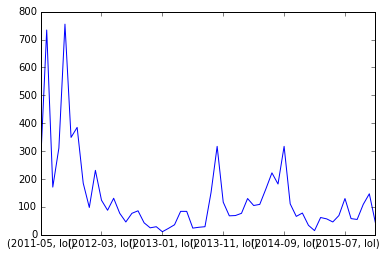

In [117]:
my_laugh_words[my_laugh_words.word == "lol"].groupby([my_laugh_words.time.dt.to_period("M")]).word.value_counts().plot()

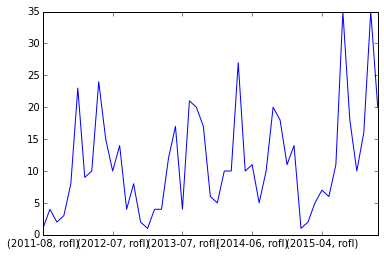

In [118]:
my_laugh_words[my_laugh_words.word == "rofl"].groupby([my_laugh_words.time.dt.to_period("M")]).word.value_counts().plot()

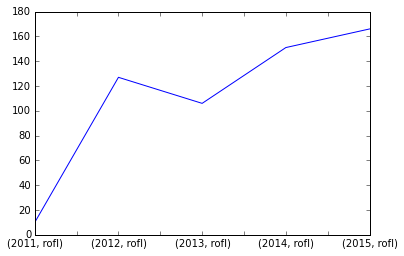

In [123]:
my_laugh_words[my_laugh_words.word == "rofl"].groupby([my_laugh_words.time.dt.to_period("Y")]).word.value_counts().plot()

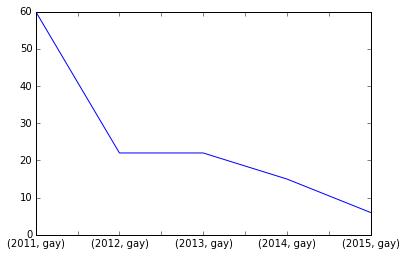

In [124]:
my_words[my_words.word == "gay"].groupby([my_words.time.dt.to_period("Y")]).word.value_counts().plot()

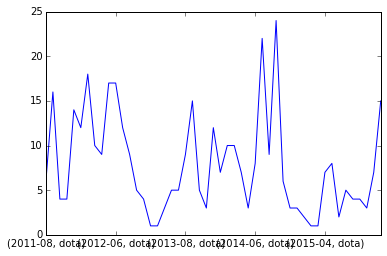

In [127]:
my_words[my_words.word == "dota"].groupby([my_words.time.dt.to_period("M")]).word.value_counts().plot()

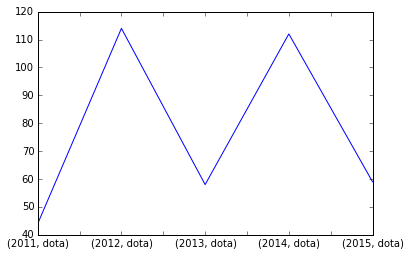

In [128]:
my_words[my_words.word == "dota"].groupby([my_words.time.dt.to_period("Y")]).word.value_counts().plot()

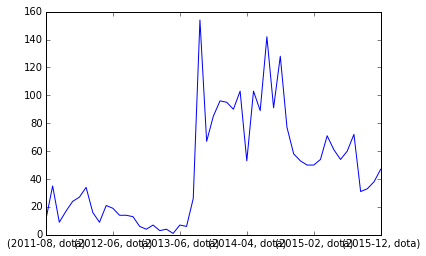

In [134]:
words[words.word == "dota"].groupby([words.time.dt.to_period("M")]).word.value_counts().plot()

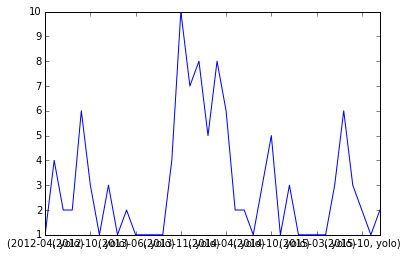

In [137]:
words[words.word == "yolo"].groupby([words.time.dt.to_period("M")]).word.value_counts().plot()

In [178]:
import matplotlib.pyplot as plt
%matplotlib qt
words[words.word == "christine"].groupby(words.time.dt.to_period("M")).word.value_counts().plot()
plt.gcf().autofmt_xdate()
#plt.show()

AttributeError: Can only use .dt accessor with datetimelike values